In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats
import researchpy as rp


1) Загрузить файл hr.csv (можно найти во сложении к заданию)

In [3]:
data = pd.read_csv('hr.csv')

In [4]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


2) Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [100]:
columns = ['среднее', 'медиана', 'мода', 'мин', 'макс', 'сред. кв. отклонение']
rows = data.columns
values = []
func = [np.mean, np.median, stats.mode, np.min, np.max, np.std]

In [101]:
for i in range(len(rows)):
    a = []
    for j in range(len(columns)):
        try:
            b = func[j](data[rows[i]])
            if func[j] == stats.mode:
                b = int(b[1])
            a.append(b)
        except:
            pass
    values.append(a)
    

In [102]:
stata = pd.DataFrame(values)
stata.columns = columns
for x in range(10):
    stata = stata.rename(index={x: rows[x]})

In [103]:
stata

,среднее,медиана,мода,мин,макс,сред. кв. отклонение
satisfaction_level,0.612834,0.64,358,0.09,1.0,0.248622
last_evaluation,0.716102,0.72,358,0.36,1.0,0.171163
number_project,3.803054,4,4365,2.00,7.0,1.232551
average_montly_hours,201.050337,200,153,96.00,310.0,49.941434
time_spend_company,3.498233,3,6443,2.00,10.0,1.460088
Work_accident,0.144610,0,12830,0.00,1.0,0.351707
left,0.238083,0,11428,0.00,1.0,0.425910
promotion_last_5years,0.021268,0,14680,0.00,1.0,0.144277
sales,4140.000000,IT,technical,NaN,NaN,NaN
salary,2.347290,2,7316,1.00,3.0,0.625799


3 Рассчитать и визуализировать корреляционную матрицу для переменных

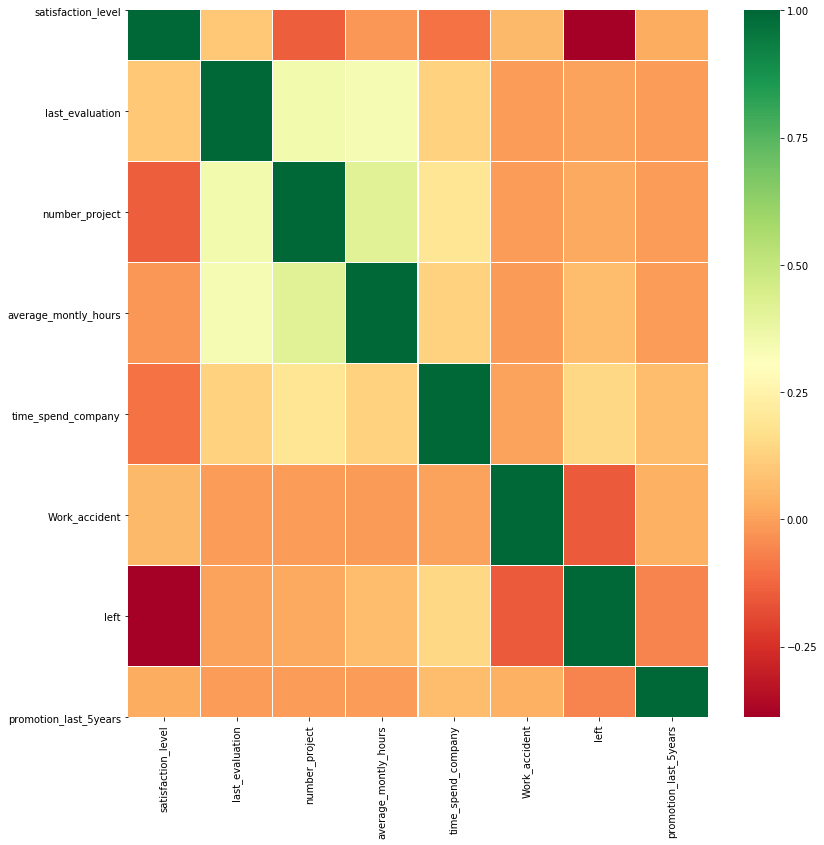

In [5]:
cor = data.corr()
f, ax = plt.subplots(figsize=(13, 13))
corr = np.round_(cor, decimals=2)
sns.heatmap(cor,annot=False,cmap='RdYlGn',linewidths=0.05)

4) Визуализировать несколько взаимосвязей между переменными


Text(0.5, 1.0, 'К. корреляции равен -0.020048113219473005; \n  пример отсутствия взаимосвязи')

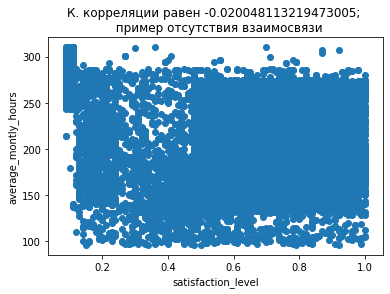

In [11]:
plt.scatter(data.satisfaction_level, data.average_montly_hours)
plt.xlabel('satisfaction_level')
plt.ylabel('average_montly_hours')
plt.title(f'К. корреляции равен {stats.pearsonr(data.satisfaction_level, data.average_montly_hours)[0]}; \n  пример отсутствия взаимосвязи')

Text(0.5, 1.0, 'К. корреляции равен 0.4172106344017771; \n  пример наличия взаимосвязи')

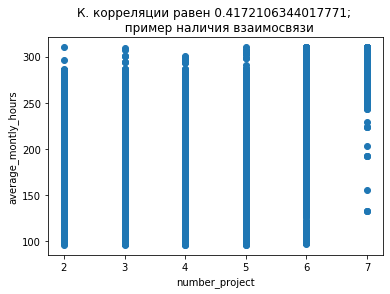

In [13]:
plt.scatter(data.number_project, data.average_montly_hours)
plt.xlabel('number_project')
plt.ylabel('average_montly_hours')
plt.title(f'К. корреляции равен {stats.pearsonr(data.number_project, data.average_montly_hours)[0]}; \n  пример наличия взаимосвязи')

5) С использованием t-test статистики проверить взаимосвязи между несколькими переменными


In [14]:
for i in range(len(data.columns)):
    for j in range(len(data.columns)):
        if i != j:
            try:
                t = stats.ttest_ind(data.iloc[:,i],data.iloc[:,j])
                print(f'Результат t-теста между переменными {data.columns[i]} и {data.columns[j]}: \n {t} \n' )
            except:
                pass

Результат t-теста между переменными satisfaction_level и last_evaluation: 
 Ttest_indResult(statistic=-41.89868154070206, pvalue=0.0) 

Результат t-теста между переменными satisfaction_level и number_project: 
 Ttest_indResult(statistic=-310.721972689063, pvalue=0.0) 

Результат t-теста между переменными satisfaction_level и average_montly_hours: 
 Ttest_indResult(statistic=-491.5064991295991, pvalue=0.0) 

Результат t-теста между переменными satisfaction_level и time_spend_company: 
 Ttest_indResult(statistic=-238.58170166684755, pvalue=0.0) 

Результат t-теста между переменными satisfaction_level и Work_accident: 
 Ttest_indResult(statistic=133.13298501842021, pvalue=0.0) 

Результат t-теста между переменными satisfaction_level и left: 
 Ttest_indResult(statistic=93.06077566920372, pvalue=0.0) 

Результат t-теста между переменными satisfaction_level и promotion_last_5years: 
 Ttest_indResult(statistic=252.03082389726003, pvalue=0.0) 

Результат t-теста между переменными last_evaluati

In [ ]:
# Средние ни у одной численной переменной не равны

6) Рассчитать сколько работников работает в каждом департаменте


In [8]:
for x in set(data['sales']):
    print (f'В отделе {x} работает {len(data[ data.sales==x])}')

В отделе RandD работает 787
В отделе IT работает 1227
В отделе support работает 2229
В отделе management работает 630
В отделе accounting работает 767
В отделе technical работает 2720
В отделе marketing работает 858
В отделе product_mng работает 902
В отделе sales работает 4140
В отделе hr работает 739


7) Показать распределение сотрудников по зарплатам


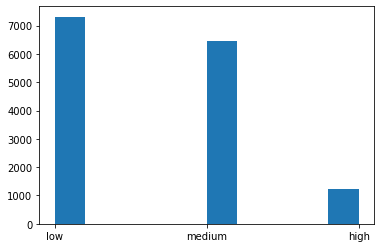

In [15]:
plt.hist(data['salary'])
plt.show()

8) Показать распределение сотрудников по зарплатам совместно с департаментами


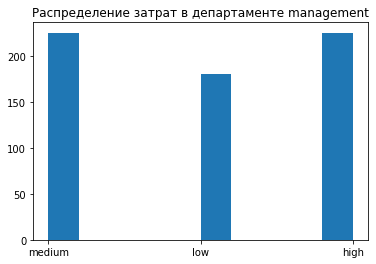

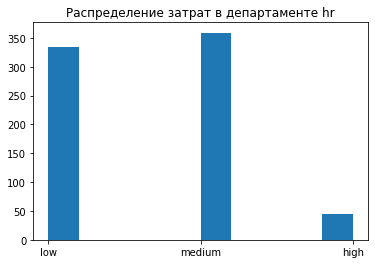

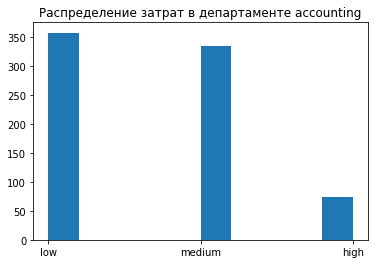

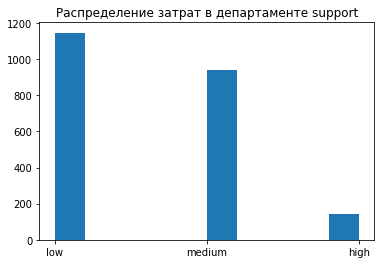

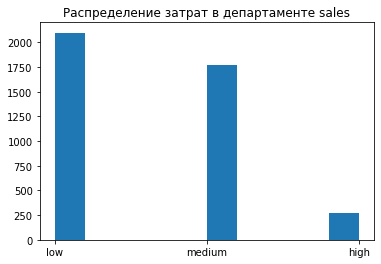

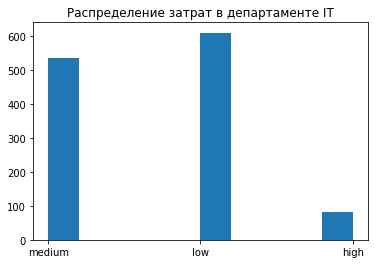

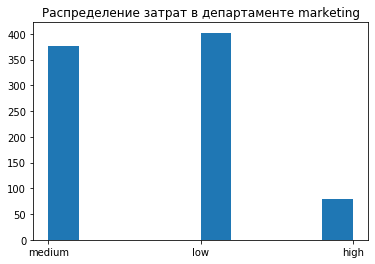

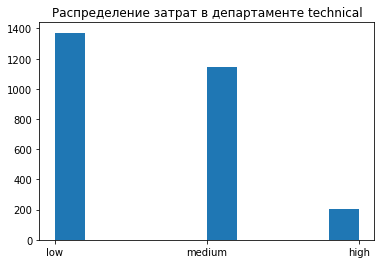

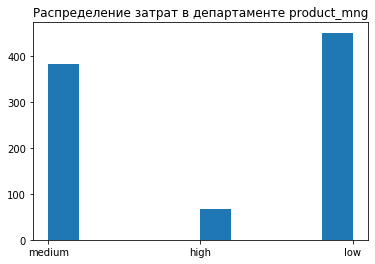

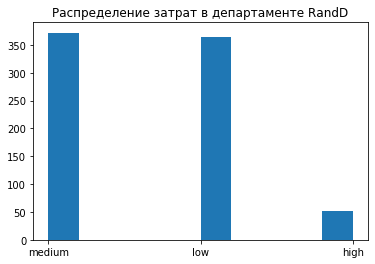

In [16]:
for x in set(data['sales']):
    plt.hist(data[ data['sales']== x]['salary'])
    plt.title(f'Распределение затрат в департаменте {x}')
    plt.show()

9) Сколько сотрудников покинули компанию


In [17]:
print(f'Компанию покинуло {len(data [data.left == 1])} сотрудников')

Компанию покинуло 3571 сотрудников


10) Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию


In [14]:
data2 = pd.get_dummies(data)
data2 = data2

In [15]:
for i in range(len(data2.columns)):
    if data2.columns[i] != 'left':
        t = stats.ttest_ind(data2[ data2['left']==0].iloc[:,i],data2[ data2['left']==1].iloc[:,i])
        if t[1] > 0.05:
            print(f'Результат t-теста для переменной {data2.columns[i]}: \n {t} \n' )


Результат t-теста для переменной last_evaluation: 
 Ttest_indResult(statistic=-0.8042416167796329, pvalue=0.4212701963735056) 

Результат t-теста для переменной salary: 
 Ttest_indResult(statistic=0.158431592677822, pvalue=0.8741188539793499) 

Результат t-теста для переменной sales_IT: 
 Ttest_indResult(statistic=1.3379586614919257, pvalue=0.1809301995609607) 

Результат t-теста для переменной sales_accounting: 
 Ttest_indResult(statistic=-1.8617820653874602, pvalue=0.06265336195730924) 

Результат t-теста для переменной sales_marketing: 
 Ttest_indResult(statistic=0.1052323360892744, pvalue=0.9161928600151945) 

Результат t-теста для переменной sales_product_mng: 
 Ttest_indResult(statistic=1.350736814414416, pvalue=0.1768001345315307) 

Результат t-теста для переменной sales_sales: 
 Ttest_indResult(statistic=-1.2153024839872792, pvalue=0.22426987656894623) 

Результат t-теста для переменной sales_support: 
 Ttest_indResult(statistic=-1.3104354299334968, pvalue=0.19006864310449398) 

In [16]:
#Вывод: сотрудники покидают компанию из-за низкой оценки (их уволняют), а также из-за зарплаты. Можно "условно" сказать, 
#что сотрудники увольняются из вышеперечисленных отделов из-за текучки, характерной каждому из департаментов, но 
# тест некорректен, так как в этом случае со временем количество сотрудников будет оставаться незименным, а 
# количество уволенных будет увеличиваться.
